In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [44]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [45]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [46]:
corrs = df_market_data.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


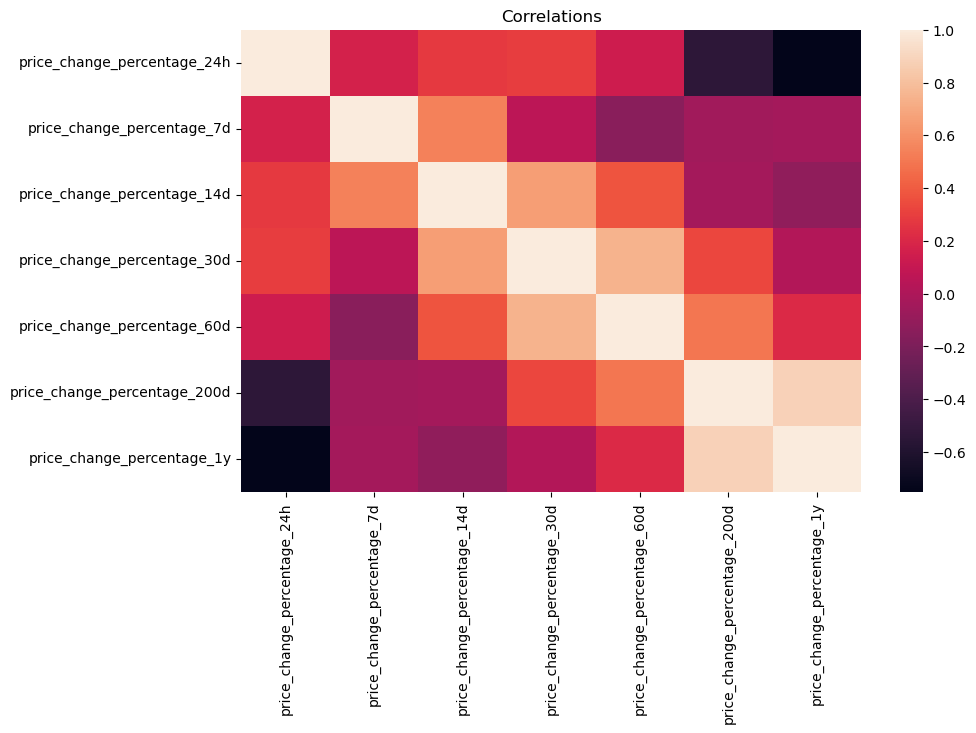

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.title("Correlations")
plt.show()

In [48]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [49]:
# get rid of the NULLs
# There were no nulls so no need to do this!
features = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y']
df_market_data = df_market_data.loc[:, features]
df_market_data = df_market_data.dropna(how="any").reset_index(drop=True)
df_market_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.4 KB


In [50]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [51]:
# Create a list with the number of k-values from 1 to 11
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

In [52]:
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_scaled)
    inertia.append(k_model.inertia_)


In [53]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [54]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3 or 4 look like the best k values but analysis will determine which one is best. Please see below. I would go with k = 4 since that elbow looks more defined than at 3.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [55]:
# Initialize the K-Means model using the best value for k
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
# Fit the K-Means model using the scaled data
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(df_market_data)

# Make predictions
k_lower = model.predict(df_market_data)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = df_market_data.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [56]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
spread_df_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower",
    hover_cols=["coin_id"]
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [57]:
# Initialize the K-Means model using the best value for k
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
# Fit the K-Means model using the scaled data
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(df_market_data)

# Make predictions
k_lower = model.predict(df_market_data)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = df_market_data.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [58]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
spread_df_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower",
    hover_cols=['coin_id']
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [59]:
# Create a PCA model instance and set `n_components=3`.
# Instantiate the PCA instance and declare the number of PCA variables
num_pca = len(df_market_data.columns)
pca = PCA(n_components=num_pca)

# Fit the PCA model on the transformed credit card DataFrame
data_pca = pca.fit_transform(df_market_data)

# Create the PCA DataFrame
df_pca = pd.DataFrame(
    data_pca,
    columns=[f"PCA{x+1}" for x in range(num_pca)]
)

df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-341.800963,-51.366775,12.525471,-8.642674,2.990849,-0.533350,-0.784000
1,-249.420466,24.117548,-14.231466,-5.204025,6.932534,-0.838179,-0.077606
2,-402.614721,-118.710737,24.838397,1.831882,-4.793617,-0.529859,0.091576
3,-406.752437,-79.487286,1.566331,-5.563183,-4.820356,-3.874063,-0.646878
4,-382.429948,-103.431959,16.753073,-24.303473,10.877026,1.445709,-1.721481


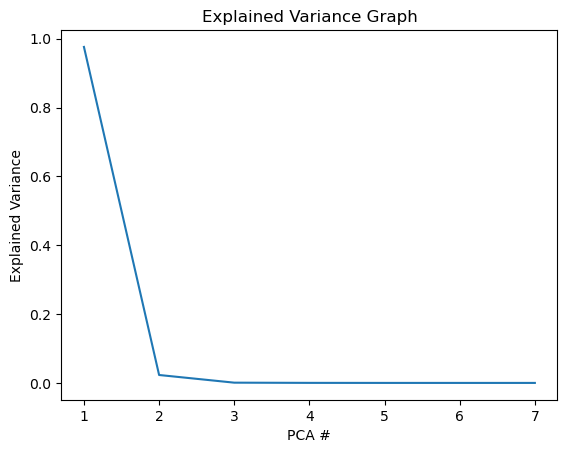

In [60]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# View the first five rows of the DataFrame. 
exp_var = pca.explained_variance_ratio_

plt.plot(range(1, num_pca + 1), exp_var)
plt.title("Explained Variance Graph")
plt.xlabel("PCA #")
plt.ylabel("Explained Variance")
plt.xticks(range(1, num_pca + 1))
plt.show()

In [61]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
print("Explained Variance")
for i in range(len(exp_var)):
    val = exp_var[i]
    print(f"PCA{i+1}:", round(val, 3))

print()
print("CUMULATIVE Explained Variance")

exp_var_cum = np.cumsum(exp_var)
for i in range(len(exp_var_cum)):
    val = exp_var_cum[i]
    print(f"PCA{i+1}:", round(val, 3))

Explained Variance
PCA1: 0.976
PCA2: 0.023
PCA3: 0.001
PCA4: 0.0
PCA5: 0.0
PCA6: 0.0
PCA7: 0.0

CUMULATIVE Explained Variance
PCA1: 0.976
PCA2: 0.999
PCA3: 1.0
PCA4: 1.0
PCA5: 1.0
PCA6: 1.0
PCA7: 1.0


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total Explained variance of PCA 1-3 is 0.97+0.023+0.001 = 0.994 or about 99%

In [63]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
df2 = df_pca.loc[:, ["PCA1", "PCA2", "PCA3"]]
df2.head()

# Copy the crypto names from the original data
df2["coin_id"] = df_pca.index

# Set the coinid column as index
df2 = df2.set_index("coin_id")

# Display sample data
df2.head()

,PCA1,PCA2,PCA3
coin_id,,,
0,-341.800963,-51.366775,12.525471
1,-249.420466,24.117548,-14.231466
2,-402.614721,-118.710737,24.838397
3,-406.752437,-79.487286,1.566331
4,-382.429948,-103.431959,16.753073


---

### Find the Best Value for k Using the PCA Data

In [64]:
# Create a list with the number of k-values from 1 to 11

In [80]:
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_pca)
    inertia.append(k_model.inertia_)


In [81]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05


In [82]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** When using the PCA data, it looks like 2 is the best value for k since the elbow is well defined.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes it differd because the k value with the original data was showing 3 or 4 as the best value.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [83]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=1)

In [84]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=3, random_state=1)

In [96]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_lower = model.predict(df_pca)

# Print the resulting array of cluster values.

In [97]:
# Create a copy of the DataFrame with the PCA data
spread_df_predictions = df_pca.loc[:, ["PCA1", "PCA2"]]

# Add a new column to the DataFrame with the predicted clusters
spread_df_predictions['clusters_lower'] = k_lower

# Display sample data
spread_df_predictions.head()

,PCA1,PCA2,clusters_lower
0,-341.800963,-51.366775,0
1,-249.420466,24.117548,0
2,-402.614721,-118.710737,0
3,-406.752437,-79.487286,0
4,-382.429948,-103.431959,0


In [99]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Plot the clusters
spread_df_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="clusters_lower"
).opts(yformatter="%.0f")

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['PC1', 'PC2']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 